In [1]:
import pandas as pd


### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')



# 1.. lets read_data & figure out missing values in data or not..

In [2]:
#read dataset

videos=pd.read_csv(r'G:\Data Science projects\EDA_Projects\Youtube\Updated_data/USvideos.csv',\
                   error_bad_lines=False)
videos.head(3)


'''
Possible reasons of getting this error:

1..
## The parser is getting confused by the header of the file. It reads 
the first row and infers the number of columns from that row. 
But the first two rows aren't representative of the actual data in the file.


2..
## This is definitely an issue of delimiter, as most of the csv CSV 
got created using sep='/t' so 
# try to use read_csv using the tab character (\t) using separator /t. 
so, try to open using following code line.

read_csv(sep='\t'))


3.. due to diff diff file structure for diff diff OS 

'''

"\nPossible reasons of getting this error:\n\n1..\n## The parser is getting confused by the header of the file. It reads \nthe first row and infers the number of columns from that row. \nBut the first two rows aren't representative of the actual data in the file.\n\n\n2..\n## This is definitely an issue of delimiter, as most of the csv CSV \ngot created using sep='/t' so \n# try to use read_csv using the tab character (\t) using separator /t. \nso, try to open using following code line.\n\nread_csv(sep='\t'))\n\n\n3.. due to diff diff file structure for diff diff OS \n\n"

In [3]:
### getting descriptive stats of data...
videos.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,40949.0,1.997243e+01,7.568327e+00,1.0,17.0,24.0,25.0,43.0
views,40949.0,2.360785e+06,7.394114e+06,549.0,242329.0,681861.0,1823157.0,225211923.0
likes,40949.0,7.426670e+04,2.288853e+05,0.0,5424.0,18091.0,55417.0,5613827.0
dislikes,40949.0,3.711401e+03,2.902971e+04,0.0,202.0,631.0,1938.0,1674420.0
comment_count,40949.0,8.446804e+03,3.743049e+04,0.0,614.0,1856.0,5755.0,1361580.0


In [4]:
videos.isnull().sum()

## videos.isna().sum()
## videos.apply(lambda x : pd.isna(x).sum())
## videos.apply(lambda x : pd.isnull(x).sum())

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

#  2.. Which video category has the 
        largest number of trending videos?

In [4]:
videos['category_id'].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43],
      dtype=int64)

In [6]:
import json
with open(r"G:\Data Science projects\EDA_Projects\Youtube\
                    Updated_data/US_category_id.json") as f:
    categories = json.load(f)

In [7]:
type(categories)

dict

In [ ]:
categories

### lets access 'items' key from dictionary..  
### bcz for each dict , ["snippet"]["title"] gives 'title_name' ..

In [ ]:
categories['items']

In [ ]:
#### now lets create one more dictionary & store data(category_id : category_name) in the form of key:value pairs..

In [27]:
cat_dict = {}
for cat in categories['items']:
    ## cat[key]=value
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]

In [28]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [29]:
videos['category_name']=videos['category_id'].map(cat_dict)

In [30]:
videos.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment


<AxesSubplot:>

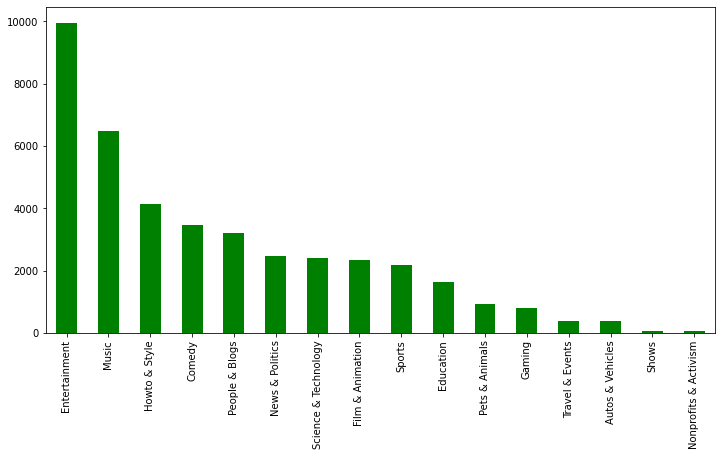

In [31]:
pd.value_counts(videos['category_name']).plot(kind='bar',\
                              color='green',figsize=(12,6))

<AxesSubplot:ylabel='category_name'>

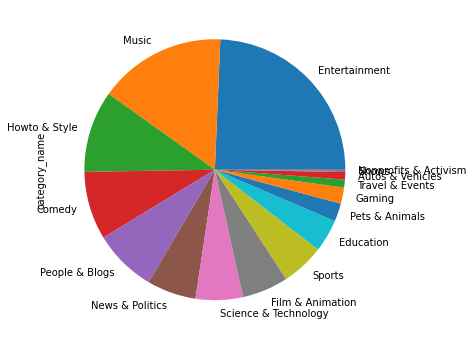

In [82]:
pd.value_counts(videos['category_name']).plot(kind='pie',\
                                      figsize=(12,6))

In [ ]:
'''

#read text file..

category =pd.read_csv(r'G:\Data Science projects\EDA_Projects\Youtube
             /category_file.txt',sep=':')
             
category.head(3)

category.reset_index(inplace=True)
category.columns=['category_id','category_columns']

category.set_index('category_id',inplace=True)


dct=category.to_dict()

videos['category_name']=videos['category_id'].map(dct['category_columns'])


'''

In [ ]:
### Lets perform above similar stuff using some alternative -- 
follow DA_Youtube_USvideos_2

# 3.. Does Title length has a significant impact on views??

In [32]:
def calc_len(x):
    return len(str(x).split())

In [33]:
videos["title"]

0                       WE WANT TO TALK ABOUT OUR MARRIAGE
1        The Trump Presidency: Last Week Tonight with J...
2        Racist Superman | Rudy Mancuso, King Bach & Le...
3                         Nickelback Lyrics: Real or Fake?
4                                 I Dare You: GOING BALD!?
                               ...                        
40944                         The Cat Who Caught the Laser
40945                           True Facts : Ant Mutualism
40946    I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...
40947                  How Black Panther Should Have Ended
40948    Official Call of Duty®: Black Ops 4 — Multipla...
Name: title, Length: 40949, dtype: object

In [34]:
## df['count_word']=df["title"].apply(lambda x: len(str(x).split()))

videos['count_word'] = videos["title"].apply(calc_len)

"\nimport matplotlib.pyplot as plt\nplt.scatter(x=videos['views'], y=videos['count_word'])\n\n"

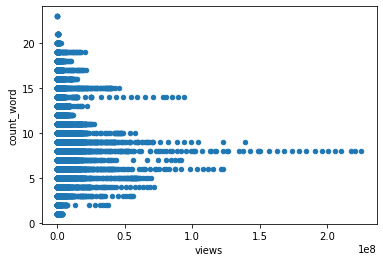

In [35]:
# Draw a scatter plot
videos.plot.scatter(x = 'views', y = 'count_word')

## videos.plot(x = 'views', y = 'count_word' , kind='scatter')

'''
import matplotlib.pyplot as plt
plt.scatter(x=videos['views'], y=videos['count_word'])

'''

# 4.. lets collect entire data of youtube ..

In [ ]:
## follow Utube1_data_collection_preparation

In [41]:
path=r'G:\Data Science projects\EDA_Projects\Youtube\Updated_data'

In [42]:
import os
os.listdir(path)

['CA_category_id.json',
 'CAvideos.csv',
 'DE_category_id.json',
 'DEvideos.csv',
 'FR_category_id.json',
 'FRvideos.csv',
 'GB_category_id.json',
 'GBvideos.csv',
 'IN_category_id.json',
 'INvideos.csv',
 'JP_category_id.json',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'MX_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'RUvideos.csv',
 'US_category_id.json',
 'USvideos.csv']

In [43]:
files=os.listdir(path)
files

['CA_category_id.json',
 'CAvideos.csv',
 'DE_category_id.json',
 'DEvideos.csv',
 'FR_category_id.json',
 'FRvideos.csv',
 'GB_category_id.json',
 'GBvideos.csv',
 'IN_category_id.json',
 'INvideos.csv',
 'JP_category_id.json',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'MX_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'RUvideos.csv',
 'US_category_id.json',
 'USvideos.csv']

In [44]:
files_csv=[]
for i in range(len(files)):
    if '.csv' in files[i]:
        files_csv.append(files[i])
        
### files_csv2=[files[i] for i in range(len(files)) if 
       '.csv' in files[i]]

In [45]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

### different types of encoding-->> 
    Try calling read_csv with encoding='latin1', 
    encoding='iso-8859-1' or encoding='cp1252'
    By-default is UTF-8
    
    Again , encoding may change depending upon data  , 
    country data , sometimes regional data as well.
    
    Fore more inforation on Encoding -- Follow below
https://docs.python.org/3/library/codecs.html#standard-encodings

In [46]:
# now to create a final dataframe with all the datapoints in it of all the countries..


full_df = pd.DataFrame()
for file in files_csv:
    
    ## define encoding as in japanese data , we are getting UnicodeDecode error..
    current_df = pd.read_csv(path+'/'+file,encoding=\
                 'iso-8859-1',error_bad_lines=False)
    
    ### inserting country column in dataframe..
    current_df['country'] = file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])



In [31]:
full_df.shape

(375942, 17)

In [32]:
full_df.isnull().sum()

## full_df.isna().sum()
## full_df.apply(lambda x : pd.notna(x).sum())
## full_df.apply(lambda x : pd.notnull(x).sum())

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
country                       0
dtype: int64

# 5.. how to extract derived attributes from data..

### Follow for time series stuffs..->>  _21.. Pandas_time series.ipynb

In [ ]:
### By-default Pandas consider trending_date & publish_time into date-time as of object nature..

### first convert trending_date & publish_time into date-time in order to fetch date-time features from trending_date & publish_time

In [47]:
full_df['trending_date']

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
40944    18.14.06
40945    18.14.06
40946    18.14.06
40947    18.14.06
40948    18.14.06
Name: trending_date, Length: 375942, dtype: object

In [48]:
full_df['trending_date'] = pd.to_datetime(full_df['trending_date'],errors='coerce',format='%y.%d.%m')

In [49]:
full_df['publish_time'] = pd.to_datetime(full_df['publish_time'],errors='coerce')

In [50]:
full_df['publish_time']

0       2017-11-10 17:00:03+00:00
1       2017-11-13 17:00:00+00:00
2       2017-11-12 19:05:24+00:00
3       2017-11-12 18:01:41+00:00
4       2017-11-09 11:04:14+00:00
                   ...           
40944   2018-05-18 13:00:04+00:00
40945   2018-05-18 01:00:06+00:00
40946   2018-05-18 17:34:22+00:00
40947   2018-05-17 17:00:04+00:00
40948   2018-05-17 17:09:38+00:00
Name: publish_time, Length: 375942, dtype: datetime64[ns, UTC]

In [51]:
full_df['publish_month']=full_df['publish_time'].dt.month

In [52]:
full_df['publish_hour']=full_df['publish_time'].dt.hour

### without converting publishing_hour into date-time
### df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])

In [53]:
full_df['publish_date']=full_df['publish_time'].dt.date

### to insert column at particular location..
### syntax-->> full_df.insert(loc, column, value)
### full_df.insert(4, 'publish_date', my_df['publish_time'].dt.date)

In [54]:
full_df["publishing_day"] = full_df["publish_time"].dt.weekday

## without converting publishing_hour into date-time
### df["publishing_day"] = df["publish_time"].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))

In [55]:
full_df['publishing_day']

0        4
1        0
2        6
3        6
4        3
        ..
40944    4
40945    4
40946    4
40947    3
40948    3
Name: publishing_day, Length: 375942, dtype: int64

In [56]:
day={0:'Monday', 1:'Tuesday' ,2:'Wednesday', 3:'Thursday' ,4:'Friday' ,5:'Saturday' ,6:'Sunday'}

In [57]:
full_df["publishing_day"] = full_df["publishing_day"].map(day)

# 6.. how to export your data 

In [ ]:
## lets figure it out whether we have dupliate rows in our data or not !

In [58]:
full_df.duplicated().sum()

12570

In [ ]:
full_df.duplicated()

In [ ]:
### how to find duplicated observations in your data
full_df[full_df.duplicated(keep=False)]

### duplicated() function of pandas , follow DA_Sales_analysis_production

In [ ]:
## lets figure it out what are the rows of 'description' that have missing value.. 

In [ ]:
full_df[full_df["description"].apply(lambda x: pd.isna(x))]

### full_df[full_df['description'].isnull()]

In [ ]:
### takes 5 minute 
my_df.to_csv(r'G:\Data Science projects\EDA_Projects\Youtube\clean_Data/my_df.csv',index=False)

### as its a huge real world data , it takes times 
### we can consider sample of data depending on how efficient system is..
### my_df.sample(10000).to_csv(r'G:\Data Science projects\EDA_Projects\Youtube/my_df2.csv',index=False)

### takes around 13 mins
my_df_full.to_csv(r'G:\Data Science projects\EDA_Projects\Youtube\clean_data/my_df_full.csv',index=False)

# 7.. What are Top trending videos_title that trend alot in US ?

In [59]:
full_df.shape

(375942, 21)

In [60]:
usa=full_df[full_df['country']=='US']

In [61]:
usa.shape

(40949, 21)

In [62]:
### ie, title is -0CMnp02rNY , we have total trending_date as 6 or it trends for 6 days .
usa.groupby(['video_id']).count()



,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_month,publish_hour,publish_date,publishing_day
video_id,,,,,,,,,,,,,,,,,,,,
-0CMnp02rNY,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
-0NYY8cqdiQ,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-1Hm41N0dUs,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
-1yT-K3c6YI,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
-2RVw2_QyxQ,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwEn-ambXLw,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
zxUwbflE1SY,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
zxwfDlhJIpw,23,23,23,23,23,23,23,23,23,23,23,23,23,23,0,23,23,23,23,23


In [63]:
usa.groupby(['video_id']).count()['title']

video_id
-0CMnp02rNY     6
-0NYY8cqdiQ     1
-1Hm41N0dUs     3
-1yT-K3c6YI     4
-2RVw2_QyxQ     3
               ..
zwEn-ambXLw    12
zxUwbflE1SY     5
zxwfDlhJIpw    23
zy0b9e40tK8     1
zzQsGL_F9_c     2
Name: title, Length: 6351, dtype: int64

In [64]:
usa.groupby(['video_id']).count()['title'].sort_values(ascending=False)

video_id
j4KvrAUjn6c    30
MAjY8mCTXWk    29
r-3iathMo7o    29
QBL8IRJ5yHU    29
8h--kFui1JA    29
               ..
FchkqXEg0qs     1
34By94AKkZE     1
bT9HPXKP5dI     1
7Nv1KoqM6vc     1
YPHDFdk_BW8     1
Name: title, Length: 6351, dtype: int64

# 8.. Most common words(Trending words) in video titles

In [65]:
title_words = list(full_df["title"].apply(lambda x: x.split()))

In [66]:
type(title_words)

list

In [67]:
len(title_words)

375942

In [68]:
title_words[0:5]

[['Eminem', '-', 'Walk', 'On', 'Water', '(Audio)', 'ft.', 'BeyoncÃ©'],
 ['PLUSH', '-', 'Bad', 'Unboxing', 'Fan', 'Mail'],
 ['Racist',
  'Superman',
  '|',
  'Rudy',
  'Mancuso,',
  'King',
  'Bach',
  '&',
  'Lele',
  'Pons'],
 ['I', 'Dare', 'You:', 'GOING', 'BALD!?'],
 ['Ed', 'Sheeran', '-', 'Perfect', '(Official', 'Music', 'Video)']]

In [70]:
### as title_words is a 2-D list , so we have to make it 1-D list to compute frequency of each word,so we have to iterate as->> 

title_words_1D = [x for y in title_words for x in y]


### alternate 
'''
title_words_1D=[]
for y in title_words:
    for x in y:
        title_words_1D.append(x)
'''        

'\ntitle_words_1D=[]\nfor y in title_words:\n    for x in y:\n        title_words_1D.append(x)\n'

In [71]:
title_words_1D[0:10]

['Eminem',
 '-',
 'Walk',
 'On',
 'Water',
 '(Audio)',
 'ft.',
 'BeyoncÃ©',
 'PLUSH',
 '-']

In [74]:
from collections import Counter

In [75]:
Counter(title_words_1D).most_common(25)

[('-', 114525),
 ('|', 110473),
 ('2018', 27991),
 ('The', 22448),
 ('de', 20671),
 ('&', 15091),
 ('a', 10835),
 ('/', 10808),
 ('the', 10802),
 ('Episode', 10244),
 ('in', 9396),
 ('A', 9178),
 ('of', 8545),
 ('Video)', 8540),
 ('2017', 8327),
 ('2', 8077),
 ('to', 7839),
 ('Ð', 7639),
 ('Trailer', 7552),
 ('\x8bã', 7545),
 ('(Official', 7543),
 ('and', 7463),
 ('DE', 7405),
 ('vs', 7332),
 ('!', 7251)]